In [1]:
import numpy as np 
import pandas as pd 
import xarray as xr 

In [2]:
f6hr = '/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_6hr.nc'
fdaily = '/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc'

ds6hr = xr.open_dataset(f6hr)

ds6hr

<xarray.Dataset>
Dimensions:  (time: 63428, mode: 2)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2022-05-31T18:00:00
  * mode     (mode) int64 0 1
Data variables:
    RMM      (time, mode) float64 ...

In [3]:
ds6hr2daily = ds6hr.resample(time='1D').mean()
ds6hr2daily

<xarray.Dataset>
Dimensions:  (time: 15857, mode: 2)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-05-31
  * mode     (mode) int64 0 1
Data variables:
    RMM      (time, mode) float64 0.5778 1.555 0.4643 ... 1.743 0.1486 1.637

In [4]:
ds = xr.open_dataset(fdaily)
ds 

<xarray.Dataset>
Dimensions:  (time: 15857, mode: 2)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-05-31
  * mode     (mode) int64 0 1
Data variables:
    RMM      (time, mode) float32 ...

In [5]:
pc1p = ds6hr2daily['RMM'][:,0]  # 6hr daily averaged RMM1
pc2p = ds6hr2daily['RMM'][:,1]  # 6hr daily averaged RMM2
pc1t = ds['RMM'][:,0]  # daily RMM1
pc2t = ds['RMM'][:,1]  # daily RMM2

# BCC
a = sum(pc1p*pc1t+pc2p*pc2t)
b = np.sqrt(sum(pc1t*pc1t+pc2t*pc2t))
c = np.sqrt(sum(pc1p*pc1p+pc2p*pc2p))
BCC = a/b/c 
BCC 

<xarray.DataArray 'RMM' ()>
array(0.99731588)
Coordinates:
    time     datetime64[ns] 2022-05-31

In [6]:
# check if 6hr EOF pattern is correct
f6hr = '/global/homes/l/linyaoly/ERA5/reanalysis/RMMeof_ERA5_6hr.nc'
fdaily = '/global/homes/l/linyaoly/ERA5/reanalysis/RMMeof_ERA5_daily.nc'

ds6hr = xr.open_dataset(f6hr)

ds6hr

<xarray.Dataset>
Dimensions:  (mode: 2, lon: 540)
Coordinates:
  * mode     (mode) int64 0 1
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    EOF      (lon, mode) float64 ...

In [7]:
ds = xr.open_dataset(fdaily)
ds 


<xarray.Dataset>
Dimensions:  (mode: 2, lon: 540)
Coordinates:
  * mode     (mode) int64 0 1
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    EOF      (lon, mode) float32 ...

In [8]:
eof16hr = ds6hr['EOF'][0:180,0]
eof26hr = ds6hr['EOF'][0:180,1]
eof1 = ds['EOF'][0:180,0]
eof2 = ds['EOF'][0:180,1]

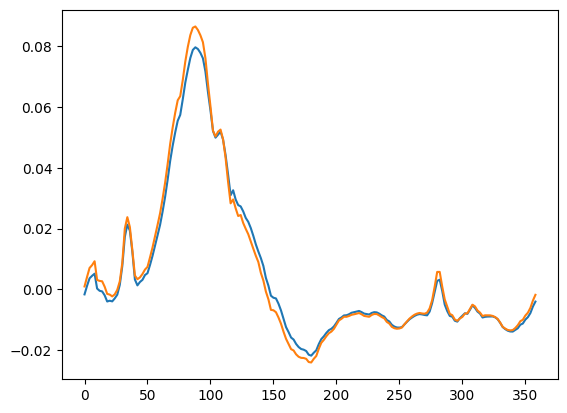

In [10]:
import matplotlib.pyplot as plt 
plt.plot(np.arange(0,360,2), eof26hr, label='6hr')
plt.plot(np.arange(0,360,2), eof2, label='day')

In [6]:
dsdaily2 = []
fdaily2 = '/global/homes/l/linyaoly/ERA5/reanalysis/omi/'
for yn in np.arange(1980,2019):
    tmp = pd.read_csv(fdaily2+str(yn)+'.csv', header=0)
    dsdaily2.append(tmp)

ds2 = pd.concat(dsdaily2, axis=0, ignore_index=True)
ds2 = ds2.iloc[:,1:4]
ds2 

,Date,PC1,PC2
0,1980-01-01,-0.11525,0.27416
1,1980-01-02,-0.08719,0.32828
2,1980-01-03,-0.05456,0.36795
3,1980-01-04,-0.02078,0.39472
4,1980-01-05,0.01145,0.41052
...,...,...,...
14240,2018-12-27,-2.07625,0.65944
14241,2018-12-28,-2.08918,0.59177
14242,2018-12-29,-2.04920,0.48003
14243,2018-12-30,-1.95947,0.31917


In [7]:
ds2['phase'] = 0
ds2.phase.astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
14240    0
14241    0
14242    0
14243    0
14244    0
Name: phase, Length: 14245, dtype: int64

In [8]:
ds2.loc[(ds2['PC1']<0) & (ds2['PC2']>0) & (ds2['PC2'] > - ds2['PC1']), 'phase'] = 5
ds2.loc[(ds2['PC1']<0) & (ds2['PC2']>0) & (ds2['PC2'] < - ds2['PC1']), 'phase'] = 6
ds2.loc[(ds2['PC1']<0) & (ds2['PC2']<0) & (ds2['PC2'] > ds2['PC1']), 'phase'] = 7
ds2.loc[(ds2['PC1']<0) & (ds2['PC2']<0) & (ds2['PC2'] < ds2['PC1']), 'phase'] = 8
ds2.loc[(ds2['PC1']>0) & (ds2['PC2']<0) & (ds2['PC2'] < - ds2['PC1']), 'phase'] = 1
ds2.loc[(ds2['PC1']>0) & (ds2['PC2']<0) & (ds2['PC2'] > - ds2['PC1']), 'phase'] = 2
ds2.loc[(ds2['PC1']>0) & (ds2['PC2']>0) & (ds2['PC2'] < ds2['PC1']), 'phase'] = 3
ds2.loc[(ds2['PC1']>0) & (ds2['PC2']>0) & (ds2['PC2'] > ds2['PC1']), 'phase'] = 4




In [9]:
ds2

,Date,PC1,PC2,phase
0,1980-01-01,-0.11525,0.27416,5
1,1980-01-02,-0.08719,0.32828,5
2,1980-01-03,-0.05456,0.36795,5
3,1980-01-04,-0.02078,0.39472,5
4,1980-01-05,0.01145,0.41052,4
...,...,...,...,...
14240,2018-12-27,-2.07625,0.65944,6
14241,2018-12-28,-2.08918,0.59177,6
14242,2018-12-29,-2.04920,0.48003,6
14243,2018-12-30,-1.95947,0.31917,6


In [9]:
dsdaily3 = []
fdaily3 = '/global/homes/l/linyaoly/ERA5/reanalysis/realRMM/'
for yn in np.arange(1979,2019):
    tmp = pd.read_csv(fdaily3+str(yn)+'.csv', header=0)
    dsdaily3.append(tmp)

ds3 = pd.concat(dsdaily3, axis=0, ignore_index=True)
ds3 = ds3.iloc[:,1:7]
ds3['Amp'] = np.sqrt(ds3.RMM1.values * ds3.RMM1.values + ds3.RMM2.values * ds3.RMM2.values)
ds3 

,year,month,day,RMM1,RMM2,phase,Amp
0,1979,1,1,0.142507,1.050470,6,1.060092
1,1979,1,2,-0.204200,1.373610,7,1.388705
2,1979,1,3,-0.158610,1.539430,7,1.547579
3,1979,1,4,-0.182450,1.459720,7,1.471078
4,1979,1,5,-0.320050,1.136800,7,1.180994
...,...,...,...,...,...,...,...
14605,2018,12,27,2.903637,1.084923,5,3.099704
14606,2018,12,28,2.616420,1.079514,5,2.830372
14607,2018,12,29,2.265292,1.095761,5,2.516394
14608,2018,12,30,2.011277,1.345773,5,2.419987


In [11]:
a = ds2.phase.values
b = ds3.phase.values

np.corrcoef(a,b)

array([[1.        , 0.43776713],
       [0.43776713, 1.        ]])

In [12]:
c = ds.phase.values
np.corrcoef(c,a)

array([[1.        , 0.37701095],
       [0.37701095, 1.        ]])

In [13]:
np.corrcoef(b,c)

array([[1.        , 0.75972746],
       [0.75972746, 1.        ]])

In [14]:
fdaily4 = '/global/homes/l/linyaoly/ERA5/reanalysis/realOMI.txt'
ds4 = pd.read_fwf(fdaily4, infer_nrows=400, names=['Year','Month','Day','PC1','PC2','Amp'],sep=' ')
ds4 = ds4.iloc[365:14610]

In [15]:
ds4

,Year,Month,Day,PC1,PC2,Amp
1980,1,1,0,0.06432,0.46460,0.46903
1980,1,2,0,0.09551,0.54102,0.54938
1980,1,3,0,0.12845,0.60566,0.61913
1980,1,4,0,0.16004,0.65876,0.67792
1980,1,5,0,0.18830,0.70065,0.72551
...,...,...,...,...,...,...
2018,12,27,0,-2.16589,0.65651,2.26320
2018,12,28,0,-2.19459,0.49977,2.25078
2018,12,29,0,-2.16544,0.30454,2.18674
2018,12,30,0,-2.07990,0.07088,2.08111


In [16]:
# compare calculated OMI vs website OMI
pc1p = ds2.PC1.values  # 6hr daily averaged RMM1
pc2p = ds2.PC2.values  # 6hr daily averaged RMM2
pc1t = ds4.PC1.values  # daily RMM1
pc2t = ds4.PC2.values  # daily RMM2

# BCC
a = sum(pc1p*pc1t+pc2p*pc2t)
b = np.sqrt(sum(pc1t*pc1t+pc2t*pc2t))
c = np.sqrt(sum(pc1p*pc1p+pc2p*pc2p))
BCC = a/b/c 
BCC 

0.9765854871640304

In [17]:
ds4['phase'] = 0
ds4.phase.astype(int)
ds4.loc[(ds4['PC1']<0) & (ds4['PC2']>0) & (ds4['PC2'] > - ds4['PC1']), 'phase'] = 5
ds4.loc[(ds4['PC1']<0) & (ds4['PC2']>0) & (ds4['PC2'] < - ds4['PC1']), 'phase'] = 6
ds4.loc[(ds4['PC1']<0) & (ds4['PC2']<0) & (ds4['PC2'] > ds4['PC1']), 'phase'] = 7
ds4.loc[(ds4['PC1']<0) & (ds4['PC2']<0) & (ds4['PC2'] < ds4['PC1']), 'phase'] = 8
ds4.loc[(ds4['PC1']>0) & (ds4['PC2']<0) & (ds4['PC2'] < - ds4['PC1']), 'phase'] = 1
ds4.loc[(ds4['PC1']>0) & (ds4['PC2']<0) & (ds4['PC2'] > - ds4['PC1']), 'phase'] = 2
ds4.loc[(ds4['PC1']>0) & (ds4['PC2']>0) & (ds4['PC2'] < ds4['PC1']), 'phase'] = 3
ds4.loc[(ds4['PC1']>0) & (ds4['PC2']>0) & (ds4['PC2'] > ds4['PC1']), 'phase'] = 4

In [18]:
ds4.to_csv('realOMIwithphase.txt')

In [19]:
a = ds2.phase.values
b = ds4.phase.values

np.corrcoef(a,b)

array([[1.        , 0.83386359],
       [0.83386359, 1.        ]])

In [20]:
a = ds4.phase.values
b = ds3.phase.values

np.corrcoef(a,b)

array([[1.        , 0.42354373],
       [0.42354373, 1.        ]])

In [21]:
a = ds4.Amp.values
b = ds3.Amp.values

np.corrcoef(a,b)

array([[1.        , 0.52486212],
       [0.52486212, 1.        ]])

In [22]:
# compare website OMI vs website RMM
pc1p = ds4.PC2.values  # OMI2
pc2p = -ds4.PC1.values  # -OMI1
pc1t = ds3.RMM1.values  # daily RMM1
pc2t = ds3.RMM2.values  # daily RMM2

# BCC
a = sum(pc1p*pc1t+pc2p*pc2t)
b = np.sqrt(sum(pc1t*pc1t+pc2t*pc2t))
c = np.sqrt(sum(pc1p*pc1p+pc2p*pc2p))
BCC = a/b/c 
BCC 

0.677568202512146

In [23]:
# compare calculated OMI vs website RMM
pc1p = ds2.PC2.values  # OMI2
pc2p = -ds2.PC1.values  # -OMI1
pc1t = ds.PC1.values  # daily RMM1
pc2t = ds.PC2.values  # daily RMM2

# BCC
a = sum(pc1p*pc1t+pc2p*pc2t)
b = np.sqrt(sum(pc1t*pc1t+pc2t*pc2t))
c = np.sqrt(sum(pc1p*pc1p+pc2p*pc2p))
BCC = a/b/c 
BCC 

0.6319788915559114

In [60]:
f5 = '/global/homes/l/linyaoly/ERA5/reanalysis/ERA5_RMM_ERA5only19790101to20191231.txt'
ds5 = pd.read_csv(f5, header=0, names=["Time", "RMM1", "RMM2","phase", "amplitude"])
ds5 = ds5.iloc[0:14610,:]
ds5 


,Time,RMM1,RMM2,phase,amplitude
0,365,0.512581,1.488746,6,1.574517
1,366,0.400910,1.774898,6,1.819614
2,367,0.285577,2.169637,6,2.188351
3,368,0.209786,2.136202,6,2.146478
4,369,0.060730,2.026289,6,2.027198
...,...,...,...,...,...
14605,14970,2.558549,-0.467162,4,2.600848
14606,14971,2.358494,-0.443781,4,2.399883
14607,14972,2.106543,-0.132022,4,2.110676
14608,14973,1.999876,0.279382,5,2.019296


In [61]:
# compare calculated RMM ERA5only vs website RMM
pc1p = ds5.RMM1.values  # OMI2
pc2p = ds5.RMM2.values  # -OMI1
# pc1p = ds.PC1.values  # OMI2
# pc2p = ds.PC2.values  # -OMI1
pc1t = ds3.RMM1.values  # daily RMM1
pc2t = ds3.RMM2.values  # daily RMM2

# BCC
a = sum(pc1p*pc1t+pc2p*pc2t)
b = np.sqrt(sum(pc1t*pc1t+pc2t*pc2t))
c = np.sqrt(sum(pc1p*pc1p+pc2p*pc2p))
BCC = a/b/c 
BCC 

0.8234797226637209

In [35]:
# compare calculated RMM ERA5only vs website OMI
pc1p = ds4.PC2.values  # OMI2
pc2p = -ds4.PC1.values  # -OMI1
pc1t = ds5.RMM1.values  # daily RMM1
pc2t = ds5.RMM2.values  # daily RMM2

# BCC
a = sum(pc1p*pc1t+pc2p*pc2t)
b = np.sqrt(sum(pc1t*pc1t+pc2t*pc2t))
c = np.sqrt(sum(pc1p*pc1p+pc2p*pc2p))
BCC = a/b/c 
BCC 

0.4574729935851848

In [36]:
f6 = '/global/homes/l/linyaoly/ERA5/reanalysis/ERA5_RMM_ERA5only20200101.txt'
ds6 = pd.read_csv(f6, header=0, names=["Time", "RMM1", "RMM2","phase", "amplitude"])
ds6 = ds6.iloc[0:365]
ds6

,Time,RMM1,RMM2,phase,amplitude
0,2020366,-1.438720,-0.437069,1,1.503644
1,2021001,-1.539291,-0.323741,1,1.572967
2,2021002,-1.704799,-0.210617,1,1.717759
3,2021003,-1.940910,-0.197274,1,1.950910
4,2021004,-2.152108,-0.286042,1,2.171034
...,...,...,...,...,...
360,2021360,0.951939,1.298108,6,1.609742
361,2021361,1.142257,1.536771,6,1.914789
362,2021362,0.720270,1.668491,6,1.817319
363,2021363,0.418879,1.754517,6,1.803827


In [42]:
f5 = '/global/homes/l/linyaoly/ERA5/reanalysis/ERA5_RMM_ERA5only19790101.txt'
ds5 = pd.read_csv(f5, header=0, names=["Time", "RMM1", "RMM2","phase", "amplitude"])
ds5.iloc[14975:-1,:]

,Time,RMM1,RMM2,phase,amplitude
14975,2020366,-0.078158,-0.714480,2,0.718743
14976,2021001,-0.301449,-0.685991,2,0.749303
14977,2021002,-0.414831,-0.734860,2,0.843863
14978,2021003,-0.630452,-0.818535,2,1.033184
14979,2021004,-0.724009,-0.967318,2,1.208261
...,...,...,...,...,...
15335,2021360,0.369745,2.007855,6,2.041615
15336,2021361,0.443122,2.314099,6,2.356143
15337,2021362,-0.012781,2.161008,7,2.161046
15338,2021363,-0.331497,1.995484,7,2.022831


In [43]:
# compare calculated RMM ERA5only year 2011 vs calculated RMM EAR5only
pc1p = ds6.RMM1.values  # OMI2
pc2p = ds6.RMM2.values  # -OMI1
pc1t = ds5.iloc[14975:-1,:].RMM1.values  # daily RMM1
pc2t = ds5.iloc[14975:-1,:].RMM2.values  # daily RMM2

# BCC
a = sum(pc1p*pc1t+pc2p*pc2t)
b = np.sqrt(sum(pc1t*pc1t+pc2t*pc2t))
c = np.sqrt(sum(pc1p*pc1p+pc2p*pc2p))
BCC = a/b/c 
BCC 

0.6716007358492614

In [2]:
# read EOF
import numpy as np 
import pandas as pd 
import xarray as xr 

# fn = '/global/homes/l/linyaoly/ERA5/reanalysis/ERA5_RMM_EOF_ERA5only19790101to20191231.txt'
# dse = pd.read_csv(fn,header=0, names=["lon", "EOF1", "EOF2"])
# dse = pd.DataFrame(dse, columns=["lon", "EOF1", "EOF2"])


# fn1 = '/global/homes/l/linyaoly/ERA5/reanalysis/ERA5_RMM_EOF_ERA5only20190101to20191231.txt'
# dse1 = pd.read_csv(fn1,header=0, names=["lon", "EOF1", "EOF2"])
# dse1 = pd.DataFrame(dse1, columns=["lon", "EOF1", "EOF2"])
# dse1

# fn2 = '/global/homes/l/linyaoly/ERA5/reanalysis/ERA5_RMM_EOF_ERA5only19790101to19791231.txt'
# dse2 = pd.read_csv(fn2,header=0, names=["lon", "EOF1", "EOF2"])
# dse2 = pd.DataFrame(dse2, columns=["lon", "EOF1", "EOF2"])
# dse2

# fn3 = '/global/homes/l/linyaoly/ERA5/reanalysis/ERA5_RMM_EOF_ERA5only20000101to20001231.txt'
# dse3 = pd.read_csv(fn3,header=0, names=["lon", "EOF1", "EOF2"])
# dse3 = pd.DataFrame(dse3, columns=["lon", "EOF1", "EOF2"])
# dse3

In [3]:
lon = np.arange(0,360,2)
lon

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358])

In [4]:
import matplotlib.pyplot as plt 
fn = '/global/homes/l/linyaoly/ERA5/reanalysis/WH04_EOFstruc.txt'
dswh = pd.read_csv(fn, skiprows=9, nrows=144*3, sep=' ', header=None, names=["x","EOF1","EOF2"])
dswh 

,x,EOF1,EOF2
0,NaN,0.020137,0.009581
1,NaN,0.021220,0.011309
2,NaN,0.022550,0.014110
3,NaN,0.024603,0.014229
4,NaN,0.026091,0.011094
...,...,...,...
427,NaN,-0.005419,0.078094
428,NaN,-0.006836,0.078419
429,NaN,-0.008139,0.078531
430,NaN,-0.009493,0.078671


In [5]:
fneof = '/global/homes/l/linyaoly/ERA5/reanalysis/RMMeof_ERA5_daily.nc'
fnpc = '/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc'
eof = xr.open_dataset(fneof)['EOF']
pc = xr.open_dataset(fnpc)['RMM']


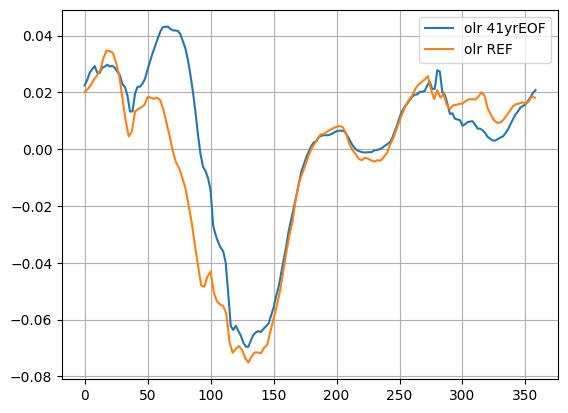

In [7]:
plt.plot(lon, eof[0:180,0], label='olr 41yrEOF')
# plt.plot(lon, dse.iloc[180:360].EOF1, label='u850')
# plt.plot(lon, dse.iloc[360:540].EOF1, label='u200')
# plt.legend()

# plt.plot(lon, dse1.iloc[0:180].EOF1, label='olr 1yrEOF 2019')
# plt.plot(lon, dse2.iloc[0:180].EOF1, label='olr 1yrEOF 1979')
# plt.plot(lon, dse3.iloc[0:180].EOF1, label='olr 1yrEOF 2000')

plt.plot(np.arange(0,360,2.5),dswh.iloc[0:144,:].EOF1, label='olr REF')
plt.legend()
plt.grid()

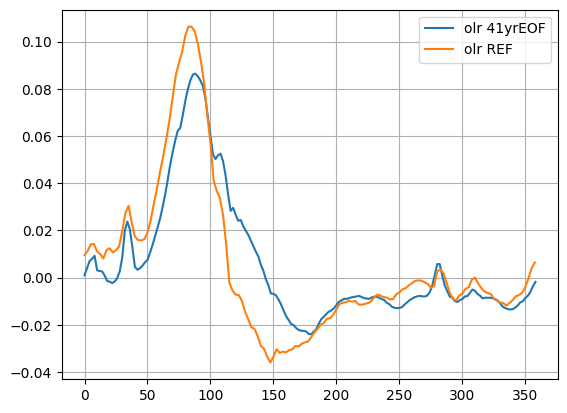

In [8]:
plt.plot(lon, eof[0:180,1], label='olr 41yrEOF')
# plt.plot(lon, dse.iloc[180:360].EOF1, label='u850')
# plt.plot(lon, dse.iloc[360:540].EOF1, label='u200')
# plt.legend()

# plt.plot(lon, dse1.iloc[0:180].EOF1, label='olr 1yrEOF 2019')
# plt.plot(lon, dse2.iloc[0:180].EOF1, label='olr 1yrEOF 1979')
# plt.plot(lon, dse3.iloc[0:180].EOF1, label='olr 1yrEOF 2000')

plt.plot(np.arange(0,360,2.5),dswh.iloc[0:144,:].EOF2, label='olr REF')
plt.legend()
plt.grid()

In [11]:
ds3

,year,month,day,RMM1,RMM2,phase,Amp
0,1979,1,1,0.142507,1.050470,6,1.060092
1,1979,1,2,-0.204200,1.373610,7,1.388705
2,1979,1,3,-0.158610,1.539430,7,1.547579
3,1979,1,4,-0.182450,1.459720,7,1.471078
4,1979,1,5,-0.320050,1.136800,7,1.180994
...,...,...,...,...,...,...,...
14605,2018,12,27,2.903637,1.084923,5,3.099704
14606,2018,12,28,2.616420,1.079514,5,2.830372
14607,2018,12,29,2.265292,1.095761,5,2.516394
14608,2018,12,30,2.011277,1.345773,5,2.419987


In [12]:
# compare 41yr RMM ERA5only vs ref RMM
pc1p = pc[0:14610,0].values  # OMI2
pc2p = pc[0:14610,1].values  # -OMI1
# pc1p = ds.PC1.values  # OMI2
# pc2p = ds.PC2.values  # -OMI1
pc1t = ds3.RMM1.values  # daily RMM1
pc2t = ds3.RMM2.values  # daily RMM2

# BCC
a = sum(pc1p*pc1t+pc2p*pc2t)
b = np.sqrt(sum(pc1t*pc1t+pc2t*pc2t))
c = np.sqrt(sum(pc1p*pc1p+pc2p*pc2p))
BCC = a/b/c 
BCC 

0.8423328760174079

In [13]:
np.sum(pc.isnull())

<xarray.DataArray 'RMM' ()>
array(0)

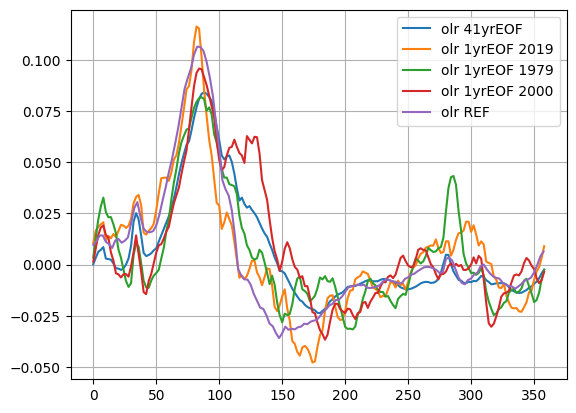

In [44]:
plt.plot(lon, dse.iloc[0:180].EOF2, label='olr 41yrEOF')
# plt.plot(lon, dse.iloc[180:360].EOF1, label='u850')
# plt.plot(lon, dse.iloc[360:540].EOF1, label='u200')
# plt.legend()

plt.plot(lon, dse1.iloc[0:180].EOF2, label='olr 1yrEOF 2019')
plt.plot(lon, dse2.iloc[0:180].EOF2, label='olr 1yrEOF 1979')
plt.plot(lon, dse3.iloc[0:180].EOF2, label='olr 1yrEOF 2000')

plt.plot(np.arange(0,360,2.5),dswh.iloc[0:144,:].EOF2, label='olr REF')
plt.legend()
plt.grid()

In [49]:
# compare the time series in 1yr data to that in 41yr data
fnpc = '/global/homes/l/linyaoly/ERA5/reanalysis/ERA5_RMM_ERA5only19790101to20191231.txt'
dspc = pd.read_csv(fnpc,header=0, names=["Time",    "RMM1",    "RMM2",    "phase",    "amplitude" ])
dspc = pd.DataFrame(dspc, columns=["Time",    "RMM1",    "RMM2",    "phase",    "amplitude" ])
dspc = dspc.iloc[0:365,:]
dspc 

,Time,RMM1,RMM2,phase,amplitude
0,365,0.512581,1.488746,6,1.574517
1,366,0.400910,1.774898,6,1.819614
2,367,0.285577,2.169637,6,2.188351
3,368,0.209786,2.136202,6,2.146478
4,369,0.060730,2.026289,6,2.027198
...,...,...,...,...,...
360,725,-0.124109,-0.869680,2,0.878491
361,726,-0.205971,-0.898648,2,0.921950
362,727,-0.013092,-0.919371,2,0.919464
363,728,0.215569,-0.600048,3,0.637595


In [50]:
fnpc1 = '/global/homes/l/linyaoly/ERA5/reanalysis/ERA5_RMM_ERA5only19790101to19791231.txt'
dspc1 = pd.read_csv(fnpc1,header=0, names=["Time",    "RMM1",    "RMM2",    "phase",    "amplitude" ])
dspc1 = pd.DataFrame(dspc1, columns=["Time",    "RMM1",    "RMM2",    "phase",    "amplitude" ])
dspc1 

,Time,RMM1,RMM2,phase,amplitude
0,365,0.117680,1.376919,6,1.381938
1,366,-0.038087,1.650085,7,1.650525
2,367,-0.116005,2.042692,7,2.045984
3,368,-0.138445,2.065621,7,2.070255
4,369,-0.291641,1.921051,7,1.943062
...,...,...,...,...,...
360,725,0.027390,-0.790062,3,0.790536
361,726,0.024064,-0.914368,3,0.914684
362,727,0.304534,-0.905117,3,0.954975
363,728,0.474078,-0.517952,3,0.702157


In [51]:
# compare 41yr RMM ERA5only vs 1yr RMM
pc1p = dspc1.RMM1.values  # OMI2
pc2p = dspc1.RMM2.values  # -OMI1
# pc1p = ds.PC1.values  # OMI2
# pc2p = ds.PC2.values  # -OMI1
pc1t = dspc.RMM1.values  # daily RMM1
pc2t = dspc.RMM2.values  # daily RMM2

# BCC
a = sum(pc1p*pc1t+pc2p*pc2t)
b = np.sqrt(sum(pc1t*pc1t+pc2t*pc2t))
c = np.sqrt(sum(pc1p*pc1p+pc2p*pc2p))
BCC = a/b/c 
BCC 

0.967320443162506

In [24]:
datadir = '/pscratch/sd/l/linyaoly/ERA5/reanalysis/'
Fn1 = datadir+'ERA5.u200GfltG.6hr.1979to2022.nc'
Fn2 = datadir+'ERA5.u850GfltG.6hr.1979to2022.nc'
Fn3 = datadir+'ERA5.olrGfltG.6hr.1979to2022.nc'
Fn4 = datadir+'ERA5.tcwv.6hr.1978to2022.nc'
Fn5 = datadir+'ERA5.v200.6hr.1978to2022.nc'
Fn6 = datadir+'ERA5.T200.6hr.1978to2022.nc'
Fn7 = datadir+'ERA5.sstGfltGmask0.6hr.1979to2022.nc'

ds = xr.open_dataset(Fn6)
mask = ds['T200'].isnull()

In [29]:
ds.sel[mask]

TypeError: 'method' object is not subscriptable

In [28]:
x = np.asarray(ds['T200'])
x 

array([[[205.31429, 205.31429, 205.31429, ..., 205.31429, 205.31429,
         205.31429],
        [205.24153, 205.25993, 205.27484, ..., 205.16702, 205.1942 ,
         205.21962],
        [206.72107, 206.71143, 206.70267, ..., 206.76051, 206.74649,
         206.73247],
        ...,
        [228.66441, 228.66791, 228.66003, ..., 228.56624, 228.61533,
         228.64864],
        [227.35928, 227.42328, 227.47937, ..., 227.14017, 227.2173 ,
         227.29004],
        [228.5119 , 228.5119 , 228.5119 , ..., 228.5119 , 228.5119 ,
         228.5119 ]],

       [[206.01636, 206.01636, 206.01636, ..., 206.01636, 206.01636,
         206.01636],
        [205.44489, 205.48607, 205.52464, ..., 205.3134 , 205.35811,
         205.4028 ],
        [205.81651, 205.87611, 205.95149, ..., 205.71571, 205.73676,
         205.77007],
        ...,
        [227.9036 , 227.8589 , 227.81946, ..., 228.03859, 227.9965 ,
         227.95181],
        [227.8589 , 227.96233, 228.05875, ..., 227.55913, 227.65204,
   